Linear fit
===========

#### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances (along the y direction) between the line and the(x,y) points.
<P>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xdata = np.array([1, 2, 3, 4, 5])
ydata = np.array([1., 2.3, 3., 3.7, 3.])
yerr = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

We want to find the parameters $a$ and $b$ of the line $y = b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ and $b$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

Compute the entries which depend on the data:

In [38]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Construct the left-hand-side matrix

In [39]:
mat = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
mat

array([[ 20.,  60.],
       [ 60., 220.]])

Compute the inverse matrix:

In [40]:
mat_inv = np.linalg.inv(mat)
mat_inv

array([[ 0.275, -0.075],
       [-0.075,  0.025]])

Check

In [41]:
np.dot(mat,mat_inv)

array([[1., 0.],
       [0., 1.]])

Compute the right-hand-side vector

In [42]:
noti = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
noti

array([ 52. , 177.6])

In [43]:
np.dot(mat_inv,noti)

array([0.98, 0.54])

Extract a and b multiplying both sides by the inverse:

In [44]:
a, b = np.dot(mat_inv,noti)[0],np.dot(mat_inv,noti)[1]
print(a)
print(b)

0.980000000000004
0.54


Plot the result:

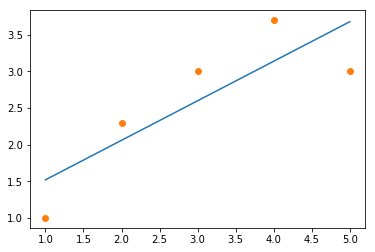

In [45]:
fig, ax = plt.subplots()
plt.plot(xdata,b*xdata+a,xdata,ydata,'o')